In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from matplotlib import font_manager, rc
import platform

# seaborn 설정 리셋
sns.reset_defaults()

# 폰트설정
if platform.system() == 'Windows' :
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else :
    print('Check your OS System')
    
# 그래프에 마이너스 표시
matplotlib.rcParams['axes.unicode_minus'] = False

### K-최근접 이웃(KNN)
- 분류모델 : 범주형 데이터 기준으로 분류하는 방식
    - 정해진 범주(종속변수)를 정해두고 제일 가까운 값으로 분류
<br>
<br>
- 회귀모델 : 연속형 데이터 (숫자)를 예측하는 방식 
    - 정해진 범주가 없고, 임의의 수치값 출력
    - 최근접 이웃의 갯수가 정해지면 이웃한 숫자 값들의 '평균'을 계산 하여 예측
    - 평균과 같거나 근사한 값의 이웃데이터를 예측 데이터로 선정 = '임의 결과값'

In [2]:
perch_lenght = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

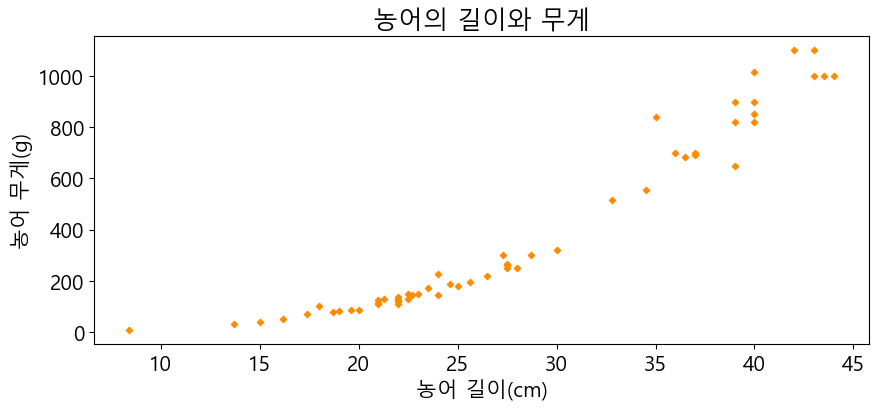

In [3]:
fig = plt.figure(figsize=(10,4))
plt.rc('font', family = 'Malgun Gothic', size = 15)
plt.title('농어의 길이와 무게')
plt.scatter(perch_lenght, perch_weight,marker='D',s = 10,c ='darkorange')
plt.xlabel('농어 길이(cm)')
plt.ylabel('농어 무게(g)')
plt.show()

In [4]:
# <해석>
# x축이 증가할때 y축이 증가 하는것으로 보아
# 농어의 길이(x축)와 농어의 무게(y축)는 비례하는 것으로 보인다.
# 즉, 길이는 무게와 연관성이 있다고 판단된다.

# 그러나 그래프의 형태가 아래쪽으로 곡선 형태를 나타내는 것 으로 보아
# 농어의 길이(x축)가 늘어난 비율만큼 농어의 무게(y축)는 증가하지 않는것으로 판단된다.
# 향후 다항 회귀모델을 통해 선형적 모델과 다항회귀모델의 검증결과를 통해 선택하고자 한다.

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
train_input, test_input, train_target, test_target = \
    train_test_split(perch_lenght,perch_weight, random_state=42)

In [7]:
print(train_input)
print('--------------------------')
print(train_target)
print('--------------------------')
print(test_input)
print('--------------------------')
print(test_target)

[19.6 22.  18.7 17.4 36.  25.  40.  39.  43.  22.  20.  22.  24.  27.5
 43.  40.  24.  21.  27.5 40.  32.8 26.5 36.5 13.7 22.7 15.  37.  35.
 28.7 23.5 39.  21.  23.  22.  44.  22.5 19.  37.  22.  25.6 42.  34.5]
--------------------------
[  85.  135.   78.   70.  700.  180.  850.  820. 1000.  120.   85.  130.
  225.  260. 1100.  900.  145.  115.  265. 1015.  514.  218.  685.   32.
  145.   40.  690.  840.  300.  170.  650.  110.  150.  110. 1000.  150.
   80.  700.  120.  197. 1100.  556.]
--------------------------
[ 8.4 18.  27.5 21.3 22.5 40.  30.  24.6 39.  21.  43.5 16.2 28.  27.3]
--------------------------
[   5.9  100.   250.   130.   130.   820.   320.   188.   900.   125.
 1000.    51.5  250.   300. ]


In [8]:
test_input

array([ 8.4, 18. , 27.5, 21.3, 22.5, 40. , 30. , 24.6, 39. , 21. , 43.5,
       16.2, 28. , 27.3])

In [9]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [10]:
train_input.shape

(42, 1)

In [11]:
from sklearn.neighbors import KNeighborsRegressor

In [16]:
# 모델 객체 생성
knr = KNeighborsRegressor()

In [17]:
# 훈련 데이터 학습
knr.fit(train_input,train_target)

KNeighborsRegressor()

In [21]:
# 훈련 모델 평가
# 분류모델 : 정확도,
# 회귀모델 : 결정계수(R^2)
    # 결정계수 공식 = 결정계수(R^2) = 1 -((target- 예측)^2& 의 합 / (target - 평균)^2 의 합)
    # 에측값이 target 값에 가까울 수록, 분자값이 0에 가까워 지며, 1에 가까워진다
knr.score(test_input, test_target)

0.992809406101064

### 오차 확인하기
- 일반적으로 결정계수값 만으로 오차를 확인하기 힘들다
- 오차 확인이 필요함

In [24]:
# 오차 확인을 위한 예측 선행
test_prediction = knr.predict(test_input)
test_prediction

array([  60. ,   79.6,  248. ,  122. ,  136. ,  847. ,  311.4,  183.4,
        847. ,  113. , 1010. ,   60. ,  248. ,  248. ])

In [26]:
# 오차 확인 함수
from sklearn.metrics import mean_absolute_error

In [28]:
mae = mean_absolute_error(test_target, test_prediction)
mae
# <해석>
# 예측값이 평균적으로 19g정도 정답데이터와 차이가 있다
# 차아가 다르다는 의미는 아님

19.157142857142862

In [29]:
knr.score(train_input, train_target)

0.9698823289099254

## 과대적합vs과소적합
- 훈련데이터와 테스트데이터를 각각 평가했을때
- 과대적합 : 훈련데이터의 평과결과가 너무 높고 테스트데이터의 평과결과가 너무 낮을경우
- 과소적합 : 훈련데이터의 평과결과가 낮고 테스트데이터의 평과결과가 높은경우

### 과소적합이 발생하는 이유
- 사용된 전체 데이터의 갯수가 너무 작은 경우에 주로 발생
- 데이터가 작으면 테스트 데이터가 훈련데이터의 특징을 잘 따르지 못하는 경우

### <해결방안>
- 훈련모델을 복잡하게 만들어서 평과결과 높이기
    -모델복잡도 : 이웃 갯수 줄이기 : 비교대상을 줄여서 집중도,정확도를 높여줌

In [47]:
score_list = []

for i in range(5,0,-1):
    knr = KNeighborsRegressor(n_neighbors=i)
    knr.fit(train_input, train_target)    
    print('훈련 데이터 이웃갯수',i,':',knr.score(train_input, train_target))
    print('테스트 데이터 이웃갯수',i,':',knr.score(test_input, test_target))
    print()

훈련 데이터 이웃갯수 5 : 0.9698823289099254
테스트 데이터 이웃갯수 5 : 0.992809406101064

훈련 데이터 이웃갯수 4 : 0.978211389719245
테스트 데이터 이웃갯수 4 : 0.9840231023848637

훈련 데이터 이웃갯수 3 : 0.9804899950518966
테스트 데이터 이웃갯수 3 : 0.9746459963987609

훈련 데이터 이웃갯수 2 : 0.9828437127041165
테스트 데이터 이웃갯수 2 : 0.9725010241788556

훈련 데이터 이웃갯수 1 : 0.9852830341215901
테스트 데이터 이웃갯수 1 : 0.991309195814175

